In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1.13

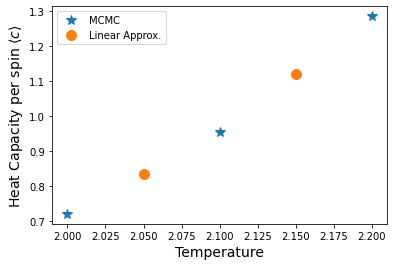

In [20]:
'''2.000000 16 -1.746046 0.720658 0.911549
2.100000 16 -1.662578 0.956355 0.868931
2.200000 16 -1.550620 1.286038 0.794644'''

T = [2.0, 2.1, 2.2]
e = [-1.746046, -1.662578, -1.550620]
Cv = [
    (e[1] - e[0])/(T[1]-T[0]),
    (e[2]-e[1])/(T[2]-T[1]),
]

fig, ax = plt.subplots()
ax.plot([T[0], T[1], T[2]], [0.720658, 0.956355, 1.286038], '*', markersize=10, label="MCMC")
ax.plot([2.05, 2.15], Cv, 'o', markersize=10, label="Linear Approx.")
ax.set_xlabel("Temperature", fontsize=14)
ax.set_ylabel(r"Heat Capacity per spin $\left<c\right>$", fontsize=14)
ax.legend()

1.14

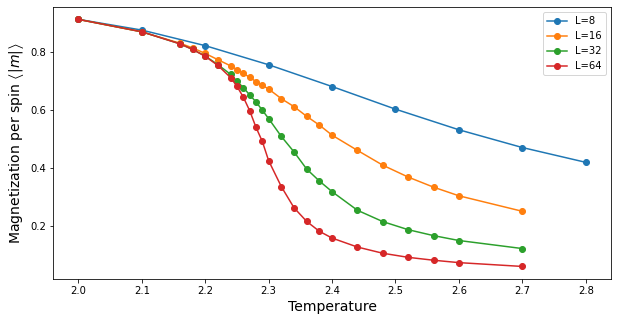

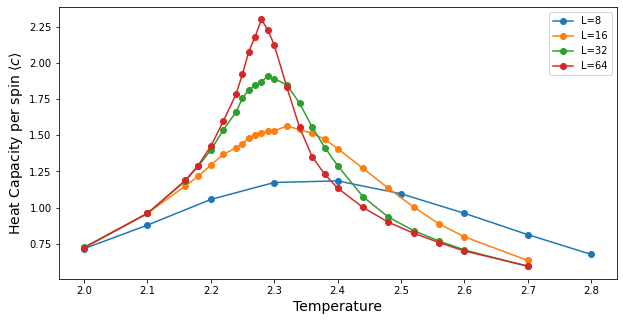

In [19]:
df = pd.read_csv("Metro/aggregated_results.txt", sep=" ")

L_8s = df[df["L"] == 8]
L_16s = df[df["L"] == 16]
L_32s = df[df["L"] == 32]
L_64s = df[df["L"] == 64]

Ls = [L_8s, L_16s, L_32s, L_64s]

fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10,5))
for data in Ls:
    Ts = data["T"]
    Cvs = data["Cv"]
    m = data["m"]
    L = data["L"].iloc[0]

    ax1.plot(Ts, m, '-o', label=f"L={L}")
    ax2.plot(Ts, Cvs, '-o', label=f"L={L}")


ax1.set_xlabel("Temperature", fontsize=14)
ax1.set_ylabel(r"Magnetization per spin $\left<\|m\|\right>$", fontsize=14)
ax1.legend()

ax2.set_xlabel("Temperature", fontsize=14)
ax2.set_ylabel(r"Heat Capacity per spin $\left<c\right>$", fontsize=14)
ax2.legend()

1.15

0.11810008571812816


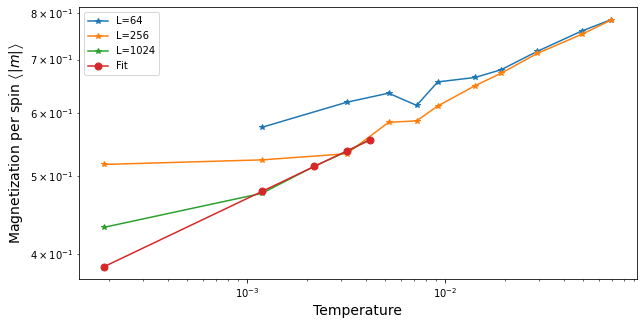

In [26]:
df = pd.read_csv("Cluster/aggregated_results.txt", sep=" ")
Tc = 2.26919

L_64 = df[df["L"] == 64]
L_256 = df[df["L"] == 256]
L_1024 = df[df["L"] == 1024]

Ls = [L_64, L_256, L_1024]
fig, ax = plt.subplots(figsize=(10, 5))
for data in Ls:
    Ts = data["T"]
    m = data["m"]
    L = data["L"].iloc[0]

    ax.loglog(Tc - Ts, m, '-*', label=f"L={L}")


Ts = L_1024["T"]
m = L_1024["m"]
x = Tc-Ts

(offset, beta) = np.polynomial.Polynomial.fit(np.log(x[0:3]), np.log(m[0:3]), 1).convert().coef
(offset, beta)
ax.loglog(x, np.exp(offset)*np.power(x, beta), '-o',markersize=7,label='Fit')
ax.legend()

ax.set_xlabel("Temperature", fontsize=14)
ax.set_ylabel(r"Magnetization per spin $\left<\|m\|\right>$", fontsize=14)

print(beta)

Bonus 1

Text(0, 0.5, 'Normalized $C_E(t)$')

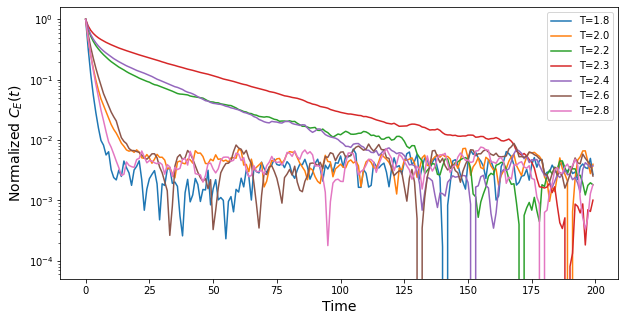

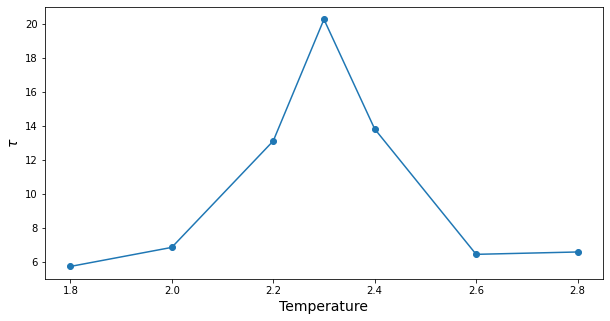

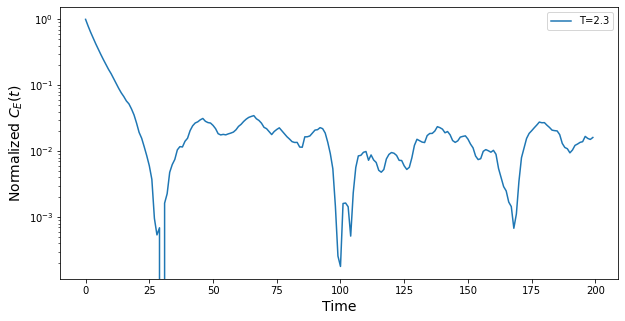

In [55]:
df_metro = pd.read_csv("Metro/aggregated_correlations.txt", sep=" ")
fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10,5))
fig3, ax3 = plt.subplots(figsize=(10,5))

T_1_8 = df_metro[df_metro["T"] == 1.8]
T_2_0 = df_metro[df_metro["T"] == 2.0]
T_2_2 = df_metro[df_metro["T"] == 2.2]
T_2_3 = df_metro[df_metro["T"] == 2.3]
T_2_4 = df_metro[df_metro["T"] == 2.4]
T_2_6 = df_metro[df_metro["T"] == 2.6]
T_2_8 = df_metro[df_metro["T"] == 2.8]
Ts = [T_1_8, T_2_0, T_2_2, T_2_3, T_2_4, T_2_6, T_2_8]

computed_taus = []
for data in Ts:
    ts = data["t"]
    C = (data["C"]-data["C"].min())/(data["C"].max()-data["C"].min())
    #C = data["C"]
    T = data["T"].iloc[0]

    numpy_ts = ts.to_numpy()
    numpy_C = C.to_numpy()

    taus = -numpy_ts[25:50]/np.log(numpy_C[25:50])
    tau = np.mean(taus)
    computed_taus.append(tau)

    ax1.plot(ts,C,label=f"T={T}")
    ax1.set_yscale("log")
ax1.legend()
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel(r"Normalized $C_E(t)$", fontsize=14)

tau_T = [data["T"].iloc[0] for data in Ts]
ax2.plot(tau_T, computed_taus, '-o')
ax2.set_xlabel("Temperature", fontsize=14)
ax2.set_ylabel(r"$\tau$", fontsize=14)

df_cluster = pd.read_csv("Cluster/aggregated_correlations.txt", sep=" ")
cluster_T = df_cluster["T"].iloc[0]
C = (df_cluster["C"]-df_cluster["C"].min())/(df_cluster["C"].max()-df_cluster["C"].min())
ax3.plot(df_cluster["t"], C, label=f"T={cluster_T}")
ax3.legend()
ax3.set_yscale("log")
ax3.set_xlabel("Time", fontsize=14)
ax3.set_ylabel(r"Normalized $C_E(t)$", fontsize=14)